In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
e = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables

Base.prepare(autoload_with = e)


In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table

M = Base.classes.measurement

S = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB

session = Session(e)

In [25]:
# Display the row's columns and data in dictionary format

M_first = session.query(M).first()
S_first = session.query(S).first()

print('measurement table')
for key,value in M_first.__dict__.items():
    print(f'{key}: {value}')

print('_'*100)

print ('station table')
for key,value in S_first.__dict__.items():
    print(f'{key}: {value}')

measurement table
_sa_instance_state: <sqlalchemy.orm.state.InstanceState object at 0x7fdb2ec22410>
tobs: 65.0
station: USC00519397
id: 1
date: 2010-01-01
prcp: 0.08
____________________________________________________________________________________________________
station table
_sa_instance_state: <sqlalchemy.orm.state.InstanceState object at 0x7fdb2ec15cf0>
latitude: 21.2716
id: 1
elevation: 3.0
longitude: -157.8168
station: USC00519397
name: WAIKIKI 717.2, HI US


# Exploratory Precipitation Analysis

In [28]:
# Find the most recent date in the data set.
session.query(M.date).order_by(M.date.desc()).first()

('2017-08-23',)

In [32]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

import datetime as dt
# Calculate the date one year from the last date in data set.

end_date = dt.date(2017, 8, 23)
start_date = end_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

prcp_one_yr = session.query(M.date, M.prcp).\
    filter(M.date >= start_date).\
    filter(M.date <= end_date).all()

prcp_one_yr

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [143]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(prcp_one_yr, columns = ['Date', 'Percipitation'])

prcp_df.head()

,Date,Percipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [144]:
# Sort the dataframe by date

sort_prcp_df = prcp_df.sort_values(by= 'Date', ascending= True)

sort_prcp_df = sort_prcp_df.set_index('Date')

sort_prcp_df.head()

,Percipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


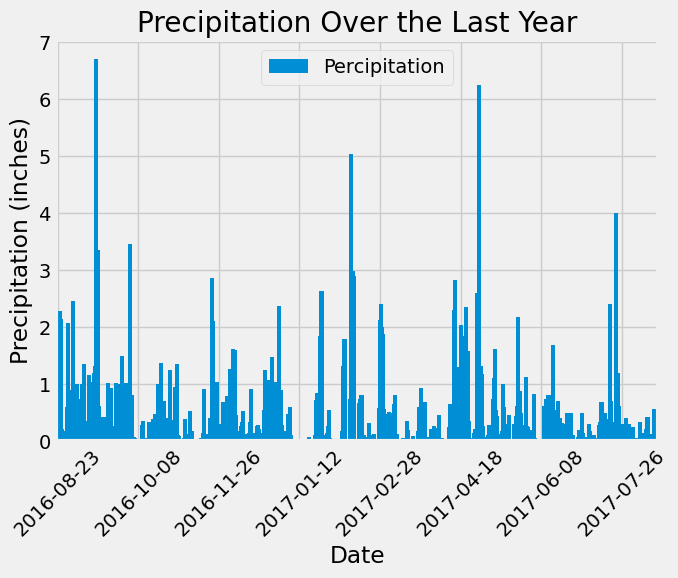

In [172]:

# Use Pandas Plotting with Matplotlib to plot the data

#sort_prcp_df.plot.bar()

ax = sort_prcp_df.plot.bar(figsize=(7, 6), width = 15)
locs, labels = plt.xticks()  
plt.xticks(locs[::300], sort_prcp_df.index[::300], rotation=45) # display every xth label

ax.legend(loc='upper center')

plt.title("Precipitation Over the Last Year")
plt.ylabel("Precipitation (inches)")
plt.xlabel("Date")



plt.tight_layout()
plt.show()

In [89]:
# Use Pandas to calculate the summary statistics for the precipitation data
quartiles = sort_prcp_df['Percipitation'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
median = quartiles[0.5]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

prcp_stat = sort_prcp_df['Percipitation'].agg(['count', 'mean', 'std', 'min', 'max'])

prcp_stat['25%'] = lowerq
prcp_stat['50%'] = median
prcp_stat['75%'] = upperq


prcp_stat_df =pd.DataFrame(prcp_stat)
prcp_stat_df

,Percipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
max,6.700000
25%,0.000000
50%,0.020000
75%,0.130000


# Exploratory Station Analysis

In [111]:
# Design a query to calculate the total number of stations in the dataset
session.query(S.id).order_by(S.id.desc()).first()

(9,)

In [112]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

  session.query(M.station, func.count(M.station).label('count')).\
  group_by(M.station).\
  order_by(func.count(M.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [120]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(
    func.min(M.tobs),
    func.max(M.tobs),
    func.avg(M.tobs)).\
    filter(M.station == 'USC00519281').all()


[(54.0, 85.0, 71.66378066378067)]

In [123]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_station = session.query(M.date, M.tobs).\
    filter(M.station == 'USC00519281').\
    filter(M.date >= start_date).\
    filter(M.date <= end_date).all()
    

tobs_df = pd.DataFrame(tobs_station)

tobs_df.head()

,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


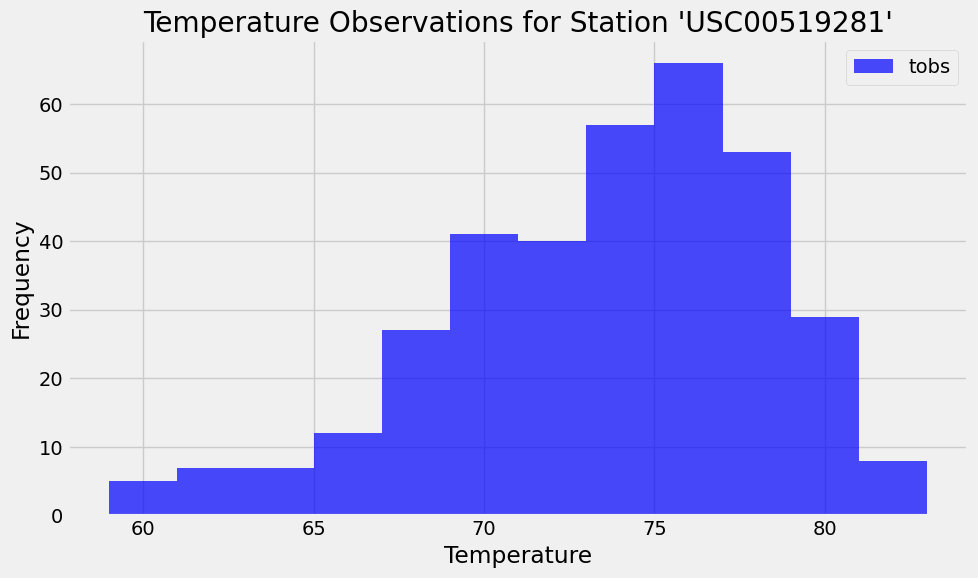

In [125]:

tobs_df['tobs'].hist(bins=12, label='tobs', color='blue', alpha=0.7, figsize=(10, 6))  


plt.title("Temperature Observations for Station 'USC00519281'")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend()


plt.tight_layout()
plt.show()


# Close Session

In [173]:
# Close Session
session.close()